# Topic 3. Algebraic data types

## 3.2 Data types

User-defined types in object-oriented languages are specified through class or trait declarations. Types can also be specified from already existing user-defined types through the inheritance mechanism.  

In functional programming, the rules for declaring new types are different: no inheritance or classes, just _products_, _sums_ and _exponentiation_ of types. Because of the correspondence with arithmetic (which goes beyond the terminology!), these types are called **algebraic data types** (ADTs). 

The goals of this section are the following:
* Understanding products, sums and exponents as the primary means of representing data types in functional programming
* Understanding the _algebraic_ nature of these types
* Being able to prove isomorphisms between algebraic data types 

### References

[__Programming in Scala, 
A comprehensive step-by-step guide__](https://www.artima.com/shop/programming_in_scala_3ed) Third Edition.
by Martin Odersky, Lex Spoon, and Bill Venners. 

- Chapter 15. Case Classes and Pattern Matching

__[Scala book (online)](https://docs.scala-lang.org/overviews/scala-book/introduction.html)__.

- [Match Expressions](https://docs.scala-lang.org/overviews/scala-book/match-expressions.html)
- [Case classes](https://docs.scala-lang.org/overviews/scala-book/case-classes.html)
- [Case objects](https://docs.scala-lang.org/overviews/scala-book/case-objects.html)

[__Functional programming simplified__](https://alvinalexander.com/downloads/fpsimplified-free-preview.pdf), by Alvin Alexander.

- Chapters 19. Functional Programming as Algebra 

[__Tony Morris on ADTs__](https://about.chatroulette.com/posts/algebraic-data-types/)

## Product types

A value of product type $T_1 * T_2$ is created with a value of $T_1$ **and** a value of $T_2$. The constructor function is:
  - `create: (T1, T2) -> T1 * T2` (create is a 2-ary function). 

Given a value of a product type, we can obtain back both values with observers:
  - `fst: T1 * T2 -> T1` 
  - `snd: T1 * T2 -> T2`
  


### Scala case classes

There are several things which are desirable to work with products/records:
 - Create new product objects without having to invoke `new`
 - Equality of product objects by value, not by reference
 - Off-the-shelf hash code
 - Pattern matching (more on this later on)


Scala can make all of this for us automatically, using so-called `case classes`: 

In [ ]:
// products Rectangle, circle, triangle 


This declaration of the `Rectangle` record is essentially equivalent to what we did manually: the `case` keyword tells the Scala compiler to generate a companion object with an `apply` constructor; override the `equals` and `hashCode` methods, among other things.

In [ ]:
// equality works


In [ ]:
// hashCode works


### Standard products in Scala: `TupleN` classes

The standard library of Scala has already defined for us generic case classes that represent the n-ary products (up to 22). The rough definition of `Tuple2` goes like this:

In [ ]:
object Std{
    // tuples in Scala, specific and generic
}

And Scala offers syntactic sugar, both for Tuple types and values. So, instead of writing something like this: 

In [ ]:
// tuples without sugar


we can write it as follows:

In [ ]:
// tuples with sugar


### Why are products called _algebraic_?

This is an example to illustrate the analogy between algebraic data types and arithmetic.

In [ ]:
// Number of values of Boolean type: ???



// Number of values of (Boolean, Boolean) type: ??? 



In general, types may be regarded as sets of values. Then, the cardinal of $A * B$, for types $A$ and $B$ is: $|A * B| = |A| * |B|$.

If product types are analogous to number multiplication, then, is there any type which corresponds to the number 1, i.e. the neutral element of the multiplication? It has to be a type $1$ such that $A*1 \cong A \cong 1*A$, where the sign $\cong$ represents the _isomorphism_ of types, i.e. the types do not need to be equal but there should be a 1-1 mapping (a bijection) between the values of $A*1$ and $A$. Since the type $1$ has to comply with the identity rules, we have that $|A*1| = |A|$, but then $|A| * |1| = |A|$. So, $|1| = 1$, i.e. $1$ must be the type with just one value, i.e. the equivalent to the singleton set. 


This type already exists in the Scala standard library, and it's called `Unit`, and its only value is `()`:

In [ ]:
// The unit type and value


### Type isomorphisms

Intuitively, we say that two types $A$ and $B$ are isomorphic if they represent the same information. More specifically, if we regard types as _sets of values_, then we can say that two types are isomorphic if their values can be put in a one-to-one correspondence, i.e. if we can establish a _bijection_ between their corresponding sets of values.

Thus, to establish an isomorphism betwween two types $A$ and $B$, we have to implement two functions $from$ and $to$, and prove that these functions are mutual inverses. These requirements can be implemented with the following _template_:

In [ ]:
// trait Isomorphic


The isomorphism $Boolean * 1 \cong Boolean$ is witnessed by the following functions: 

In [ ]:
// instantiate Isomorphic


which satisfy:
- `from(to(b))=b`, for all `b: (Boolean, Unit)`, and 
- `to(from(b))=b` for all `b: Boolean`.

In [ ]:
// raw test for all values


Or using the laws implemented in the `Isomorphic` trait:

In [ ]:
// use laws

Note that any function that returns a value of type `Unit` is completely useless from a purely functional perspective, since we already know in advance which is the (only possible) value that it returns: `()`. Therefore, if such a function makes sense is because it does something else than returning values: it must have some side effect, i.e. it has to be _impure_. This is also why we can say that `Unit` is the Scala equivalent to Java's `void`.

## Sum types       

Besides multiplying types, we can also _sum_ types. Given types $A$ and $B$, the sum type $A + B$ represents **either** a value of type $A$ **or** a value of type $B$. Therefore, we have that 

$|A + B| = |A| + |B|$

For instance (the symbol $:=$ is used to give a name to a type):

- $MaybeInt := Int + 1$. A value of this type may be an integer; if it is not, then it is the unit value (a value that we use to signal that it is not an integer). So, $|MaybeInt| = |Int| + |1| = |Int| + 1$
- $EitherIntOrString := Int + String$. A value of this type is either an integer or a string, i.e. $|EitherIntOrString| = |Int| + |String|$
- $Shape := Circle + Rectangle + Triangle$. If we have a value of type $Shape$, then we have either a $Circle$, a $Triangle$ or a $Rectangle$. So, $|Shape| = |Circle| + |Triangle| + |Rectangle|$

We create and observe values of a sum type $A + B$ with the following functions: 
- Injection functions: 
  - `injA: A -> A + B`
  - `injB: B -> A + B`
- Match function:
  - `match: (A -> C) -> (B -> C) -> A + B -> C`
  
Note that the `match` function is a higher-order function. Basically, it says: if I know how to obtain a $C$ from $A$ (using function $A \rightarrow C$), and I know how to obtain a $C$ from $B$, then I know how to obtain a $C$ from $A+B$ (since $A+B$ is either an $A$ or a $B$).

### Sum types in Scala

How do we define sum types in an object-oriented language like Scala? Basically, we need _inheritance_, but with a special twist: it has to be _sealed_.

In [ ]:
// type Shape = ...



As we already saw, the keyword `sealed` prevents the extension of the inheritance hierarchy with new subclasses. This guarantees that the sum type will remain consistent everywhere, i.e. that whenever we have an instance of `Shape` it will be either a rectangle, a circle or a triangle, and nothing else.

We create values of type `Shape` by using the constructors of its subclasses:

In [ ]:
// creation of values of type Shape



And we _observe_ these values with _pattern matching_, as follows:

In [ ]:
// observe values of type Shape, toString function



Each `case` declaration represents a function from the corresponding type to the common target result. Being `sealed`, the compiler can check whether some pattern matching expression is complete or not, and warn us in case it's not.

In [ ]:
// This is Almond specific. 
// Also, note that it's possible that this diretive does not work for some kernel versions
interp.configureCompiler(_.settings.nowarn.value = false)

In [ ]:
// A warning should be raised here



### Standard sum types in Scala

The standard library of Scala provides two important sum types: [`Option`](https://www.scala-lang.org/api/current/scala/Option.html) and [`Either`](https://www.scala-lang.org/api/current/scala/util/Either.html). They can be defined as follows: 

In [ ]:
object StdSumTypes{
    // Option
    
    // Either
}

These types are important for error handling. We will see how they allow us to get rid of exceptions, at least in the part of our code that we wish to be purely functional. Here it's a small example:

In [ ]:
// Using exceptions

def divideWithExceptions(a: Double, b: Double): Double =
    ???

In [ ]:
// divideWithExceptions(5,0)

In [ ]:
// Using option

def divideWithExceptions(a: Double, b: Double): Double =
    if (b==0) throw new Exception("divide by cero")
    else a/b

We now return a value which indicates whether there was an error or not:

In [ ]:
// Using Either

def divideWithExceptions(a: Double, b: Double): Double =
    if (b==0) throw new Exception("divide by cero")
    else a/b

And now a value which, in case of error indicates the reason:

### The 0 type in Scala

If the unit type was the identity element for product types, is there any identity type for sums? It has to be a type which satisfies the following conditions: 

- $0 + A \cong A$
- $A + 0 \cong A$

But $|0 + A| = |0| + |A|$, so $|0| = 0$, i.e. the type $0$ must not be inhabited. In other words, it is a type such that there is no value of that type. 

We don't have to define this type in Scala it ourselves, since the identity element of sums is already defined in the Scala standard library: it's the type `Nothing`. Since we can't create instances of this type, the only thing that we can do if we have to return a value of this type, or assign a variable of this type a value, is to throw an exception:

In [ ]:
lazy val impossible: Nothing = 
    ???

The `???` expression in Scala means essentially an exception of type `Nothing`. Also, note that `Nothing` is the botton of the Scala inheritance hierarchy, i.e. `Nothing` is a subclass of any Scala class. That's why we can use `???` in place of any value in Scala.

In [ ]:
def i: Int = ??? // throw new Exception("no value")

The isomorphism $Int + 0 \cong Int$ is witnessed by the following functions:

In [ ]:
// IntOrNothing := Int + Nothing


// from-to



### More on pattern matching

Let's implement a function that calculates the area of a shape:

In [ ]:
import scala.math._

// area function


In [ ]:
// some invocations


We can implement this function more conveniently, using extractors to _deconstruct_ the value and access more directly its member attributes: 

In [ ]:
// using extractors



We can also use _guards_ in `case` branches:

In [ ]:
// big shape function with guards



In [ ]:
// invoke

We can pattern match on specific _values_ of variables: 

In [ ]:
// is rectangle of specific width and height 
    

In [ ]:
// invoke


We can pattern match repeatedly until several levels of nesting:

In [ ]:
def foo(s: Either[Either[Int, String], (Int, Either[String, Boolean])]): Boolean = 
    ???

This is actually more convenient than this way:

In [ ]:
def foo(s: Either[Either[Int, String], (Int, Either[String, Boolean])]): Boolean = 
    ???

Note that `(Int+String)+Int*(String+Boolean)` $\cong$ `Int + String + Int*String + Int*Boolean`, i.e. four cases.


More details on pattern matching in Scala can be found [here](https://docs.scala-lang.org/tour/pattern-matching.html). Also, note that we can create custom pattern matching expressions using so-called [_extractors_](https://docs.scala-lang.org/tour/extractor-objects.html). We won't need them in the course, but they can be really helpful to simplifiy and get more understandable pattern matching expressions. 

## Exponent types

We already know how to build new types by _adding_ and _multiplying_ other types. We will see now that function types can be properly called _exponent_ types. Indeed, let's consider how many functions are there with type `Boolean => Boolean`:

In [ ]:
// false -> false, true -> false
// ...

In general, $|X\Rightarrow Y|=|Y|^{|X|}$, since for any $X$ we have $|Y|$ values available. 

Last, similarly to product and sum types, we exponent types have specific operations to _create_ and _observe_ their values. Particularly, we create values of exponent types using lambda expressions, and observe their values using function application. 

## Summary

The following table summarizes the constructors and deconstructors (aka observers or consumers) for the different kinds of standard algebraic data types in the Scala library. 

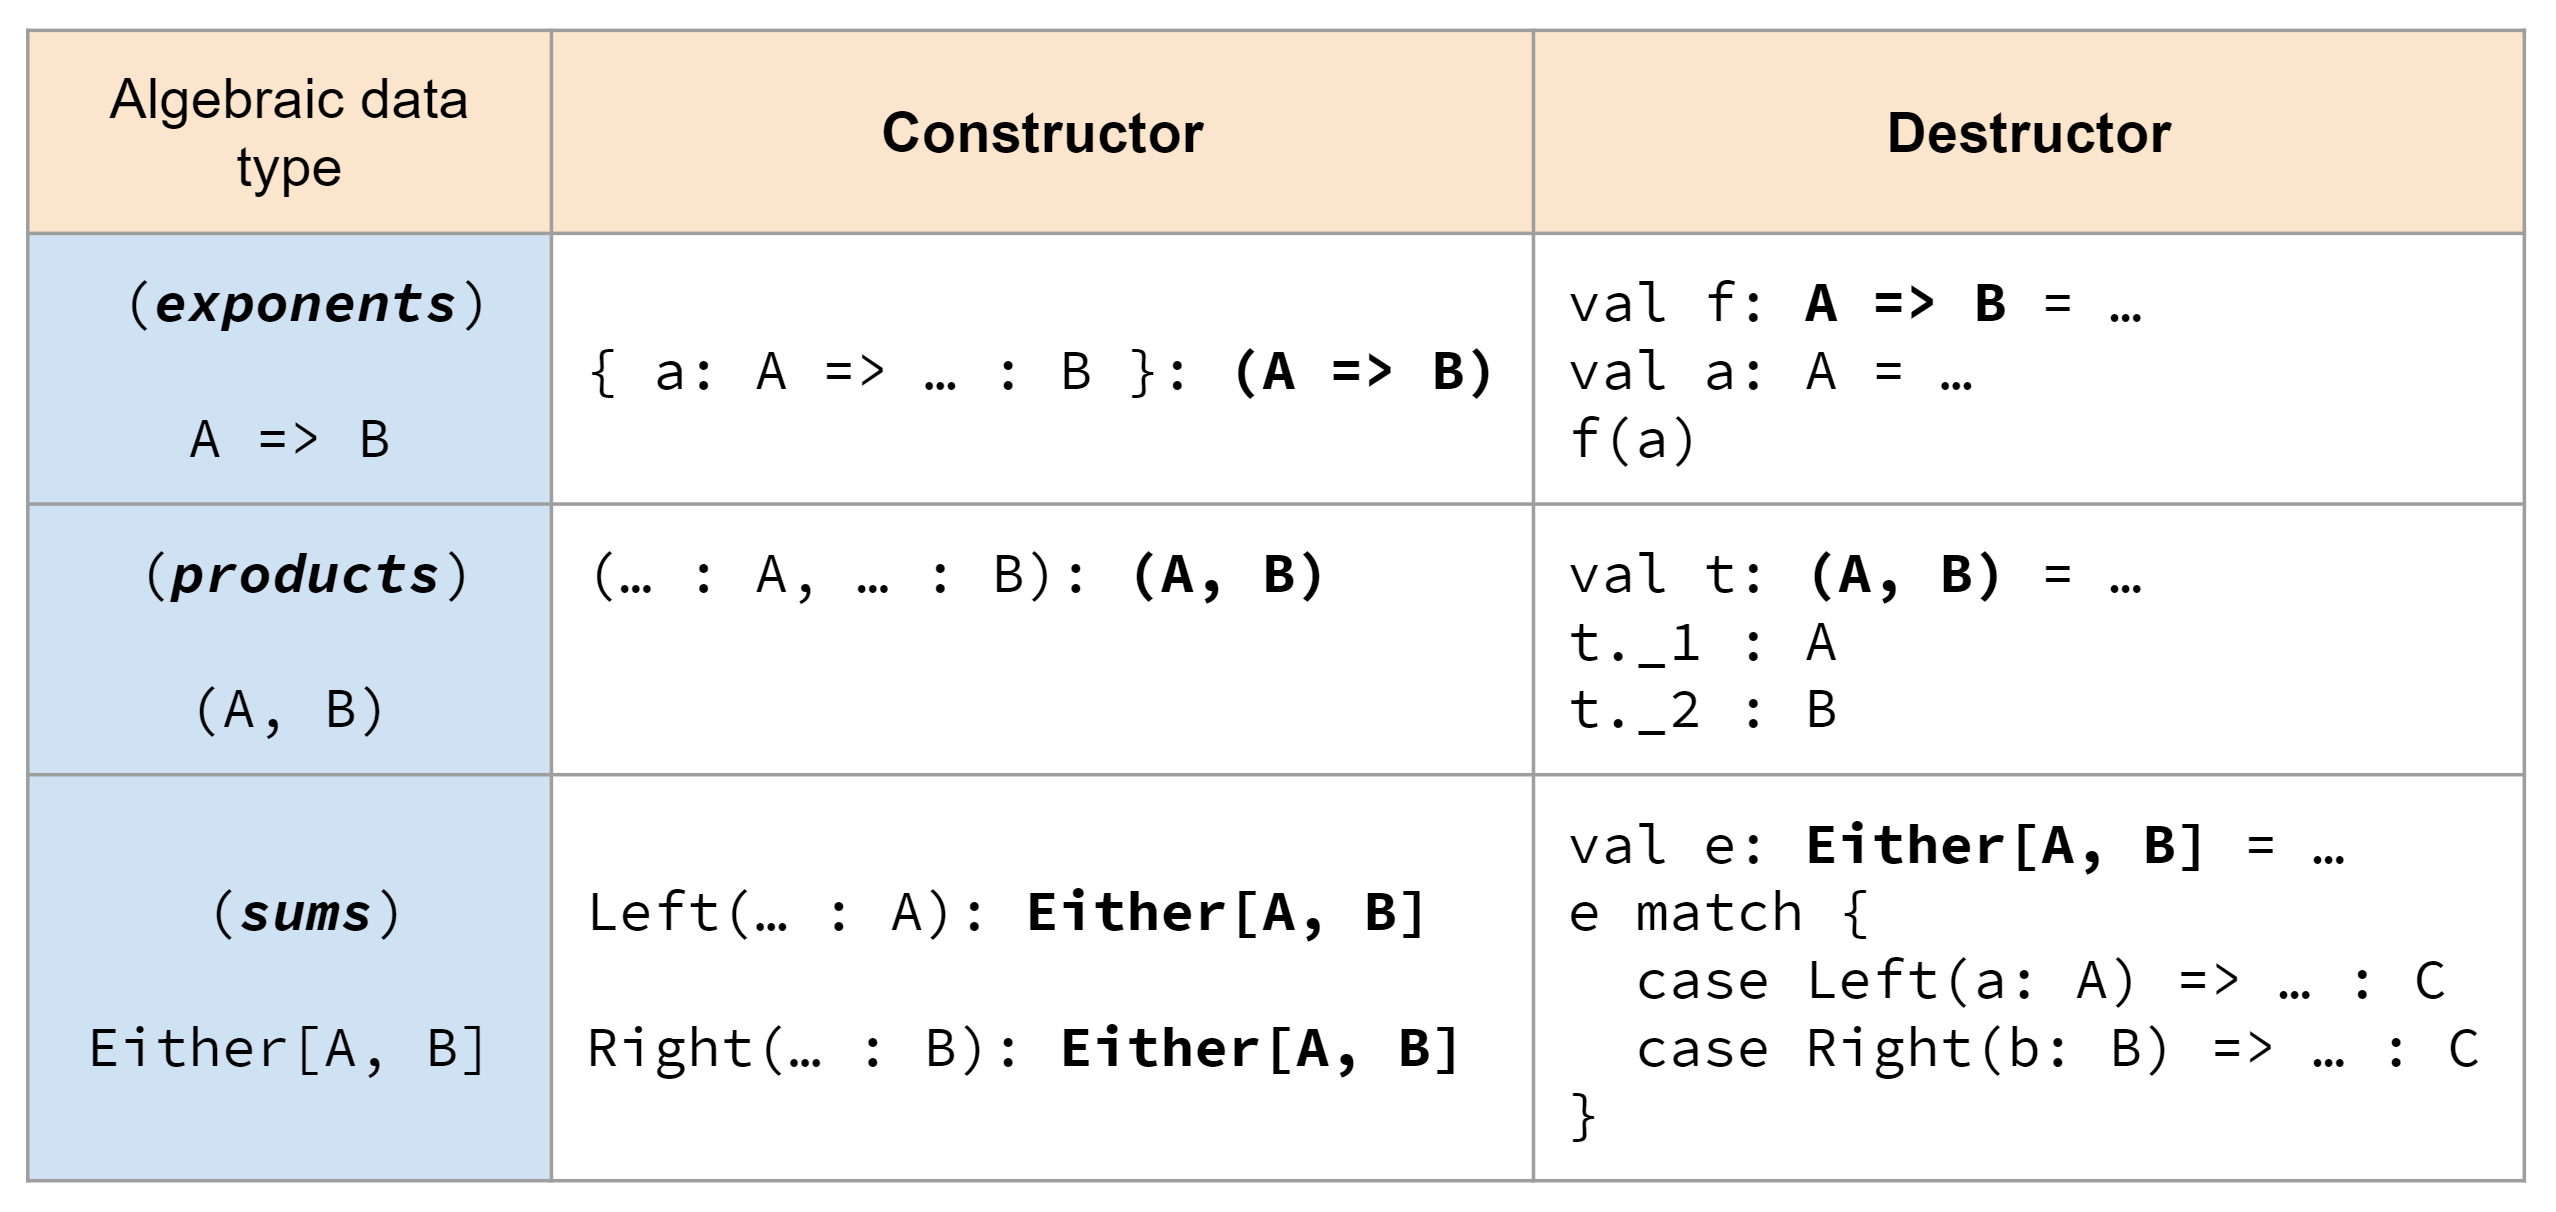

## High-school algebra equalities

The correspondence between algebraic data types and arithmetic exponents goes further, since the familiar laws of hight-school algebra holds for ADTs as well:

$$ 
\begin{array}{lrcl}
1) & X+0 & = & X \\
2) & X+Y & = & Y+X \\
3) & X+(Y+Z) & = & (X+Y)+Z \\
4) & X*0 & = & 0 \\
4) & X*1 & = & X \\
6) & X*Y & = & Y*X \\
7) & X*(Y*Z) & = & (X*Y)*Z \\
8) & X*(Y+Z) & = & X*Y+X*Z \\
9) & X^0 & = & 1 \\
10) & 1^X & = & 1 \\
11) & X^1 & = & X \\
12) & Z^{X+Y} & = &  Z^X * Z^Y \\
13) & (Y*Z)^X & = & Y^X*Z^X \\
14) & (Z^Y)^X & = & Z^{X*Y} \\
\end{array}
$$



In correspondence with these equalities, we can establish the following isomorphisms:

$$ 
\begin{array}{rcl}
Either[X,Nothing] & \cong & X \\
Either[X,Y] & \cong & Either[Y,X] \\
Either[X,Either[Y,Z]] & \cong & Either[Either[X,Y],Z] \\
(X,Nothing) & \cong & Nothing \\
(X,Unit) & \cong & X \\
(X,Y) & \cong & (Y,X) \\
(X,(Y,Z)) & \cong & ((X,Y),Z) \\
(X,Either[Y,Z]) & \cong & Either[(X,Y),(X,Z)] \\
Nothing  \Rightarrow X & \cong & Unit \\
X \Rightarrow Unit & \cong & Unit \\
Unit \Rightarrow X & \cong & X \\
Either[X,Y] \Rightarrow Z & \cong & (X \Rightarrow Z, Y \Rightarrow Z) \\
X \Rightarrow (Y,Z) & \cong & (X \Rightarrow Y, X \Rightarrow Z) \\
X \Rightarrow (Y \Rightarrow Z) & \cong & (X,Y) \Rightarrow Z \\
\end{array}
$$



And these isomorphisms hold! Let's see some examples.

## $$
\begin{array}{rcl}
X \Rightarrow Unit & \cong & Unit
\end{array}
$$

Essentially, this isomorphism tells us that we only have one implementation of the function type $X \Rightarrow 1$, for any type $X$. Namely:

In [ ]:
// the only function X => 1


In [ ]:
// In terms of the trait `Isomorphic`

which agrees with the formula: $|X \Rightarrow 1| = |1|^{|X|} = 1$.

## $$
\begin{array}{rcl}
Nothing \Rightarrow X & \cong & Unit
\end{array}$$

The same happens for $0 \Rightarrow X$, for any type $X$: 

In [ ]:
// The only function 0 => X 


In [ ]:
// In terms of the trait `Isomorphic`

(recall that `Nothing <: X` for any `X` in Scala). This agrees with the arithmetic formula $|0 => X|=|X|^0=1$.

# $$ 
\begin{array}{rcl}
Either[X,Y] \Rightarrow Z & \cong & (X \Rightarrow Z, Y \Rightarrow Z)
\end{array}
$$

We show this isomorphism by implementing the following functions:

In [ ]:
// Iso extension


The last pattern matching can also be written more concisely using so-called [partial functions](https://www.scala-lang.org/api/current/scala/PartialFunction.html): 

In [ ]:
// only to


(see this [post](https://alvinalexander.com/scala/how-to-define-use-partial-functions-in-scala-syntax-examples/) for more information on Scala partial functions).

But we must also show, or at least _test_, that both functions are mutual inverses, i.e. that:

`from(to(f)) == f`, for all `f: (Y => X, Z => X)`

`to(from(f)) == f`, for all `f: Either[Y, Z] => X`

We will perform some unit testing here with the following two functions:

In [ ]:
// ex1 and ex2 

thus fixing types $X$, $Y$ and $Z$ to $Boolean$. Then, we need the following equality functions:

In [ ]:
// overrides equalA and equalB



and, finally, we can perform our test: 

In [ ]:
// law1 and law2